In [9]:
import numpy as np
from numba import njit
import timeit
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [4]:
def game_of_life_numpy(grid, steps):
    for _ in range(steps):
        neighbors = (
            np.roll(np.roll(grid, 1, axis=0), 1, axis=1) +
            np.roll(np.roll(grid, 1, axis=0), -1, axis=1) +
            np.roll(np.roll(grid, -1, axis=0), 1, axis=1) +
            np.roll(np.roll(grid, -1, axis=0), -1, axis=1) +
            np.roll(grid, 1, axis=0) +
            np.roll(grid, -1, axis=0) +
            np.roll(grid, 1, axis=1) +
            np.roll(grid, -1, axis=1)
        )
        grid = np.where((grid == 1) & ((neighbors == 2) | (neighbors == 3)), 1, 0)
        grid = np.where((grid == 0) & (neighbors == 3), 1, grid)
    return grid

In [13]:
import numpy as np
from numba import njit

@njit
def nb_game_of_life(grid, steps):
    for _ in range(steps):
        grid = step(grid)
    return grid

@njit
def step(grid):
    rows, cols = grid.shape
    new_grid = np.zeros_like(grid)
    for i in range(rows):
        for j in range(cols):
            total = (
                grid[(i-1)%rows, (j-1)%cols] + grid[(i-1)%rows, j] + grid[(i-1)%rows, (j+1)%cols] +
                grid[i, (j-1)%cols]                             + grid[i, (j+1)%cols] +
                grid[(i+1)%rows, (j-1)%cols] + grid[(i+1)%rows, j] + grid[(i+1)%rows, (j+1)%cols]
            )
            if grid[i, j] == 1 and total in (2, 3):
                new_grid[i, j] = 1
            elif grid[i, j] == 0 and total == 3:
                new_grid[i, j] = 1
    return new_grid

In [14]:
# Initialize a random grid
grid_size = 100
steps = 10
initial_grid = np.random.choice([0, 1], size=(grid_size, grid_size))

# Copy the grid for both functions to ensure identical inputs
grid_numpy = initial_grid.copy()
grid_numba = initial_grid.copy()

In [15]:
# Benchmark NumPy implementation
numpy_time = timeit.timeit(lambda: game_of_life_numpy(grid_numpy, steps), number=10)

# warmup numba
_ = nb_game_of_life(grid_numba, steps)

# Benchmark numba implementation
numba_time = timeit.timeit(lambda: nb_game_of_life(grid_numba, steps), number=10)

print(f"NumPy implementation time: {numpy_time:.4f} seconds")
print(f"Numba implementation time: {numba_time:.4f} seconds")

NumPy implementation time: 0.0220 seconds
Numba implementation time: 0.0035 seconds


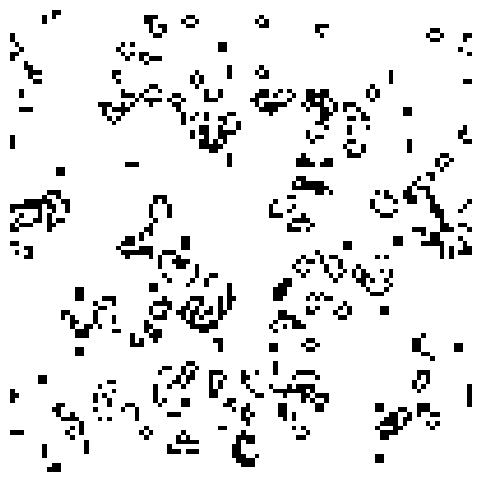

In [17]:
np.random.seed(0)
grid_size = 100
grid = np.random.choice([0, 1], size=(grid_size, grid_size))

# Matplotlib setup
fig, ax = plt.subplots(figsize=(6, 6))
img = ax.imshow(grid, cmap='Greys', interpolation='nearest')
ax.axis('off')

# Animation update
def animate(frame):
    global grid
    grid = step(grid)
    img.set_data(grid)
    return [img]

# Create and display animation
ani = FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
HTML(ani.to_jshtml())